In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
df = pd.read_csv('../Dataset/economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#Drop uneccessary columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
#Check null values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


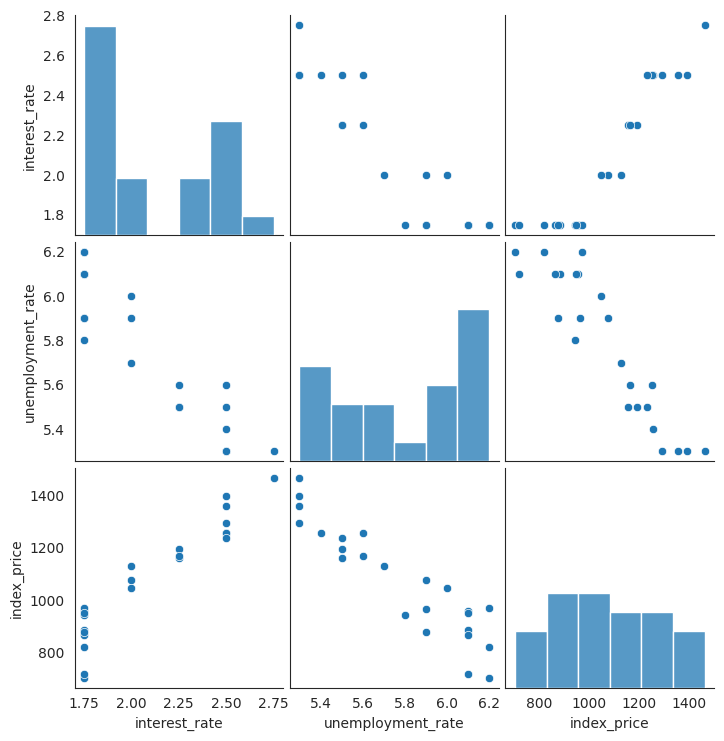

In [8]:
#Visualization
sns.pairplot(df)

In [10]:
#Correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

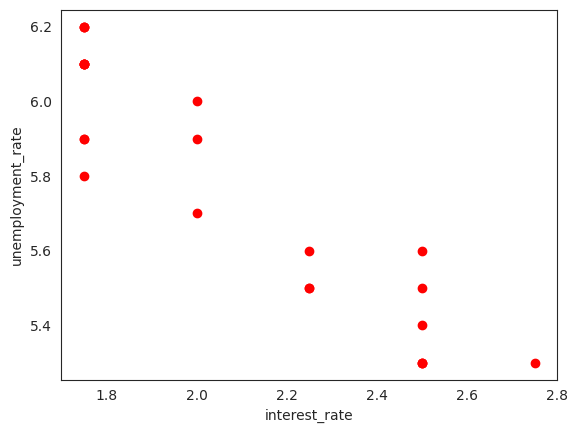

In [11]:
#Visulaize the datapoints
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [14]:
#Independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

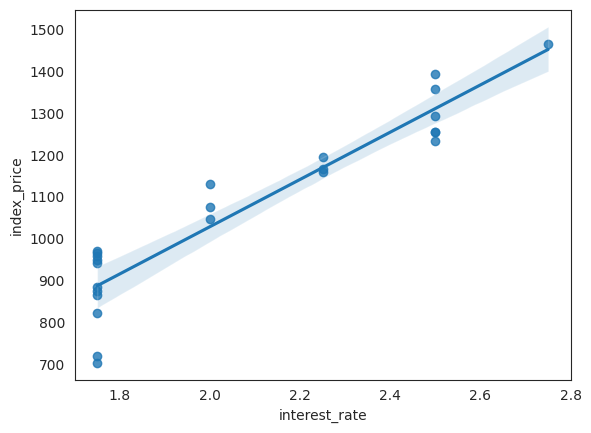

In [18]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

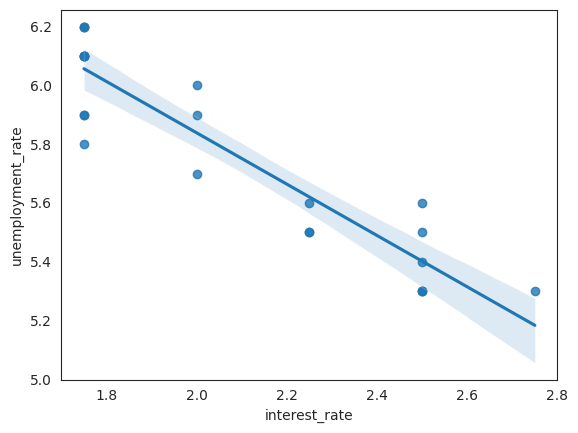

In [19]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='index_price'>

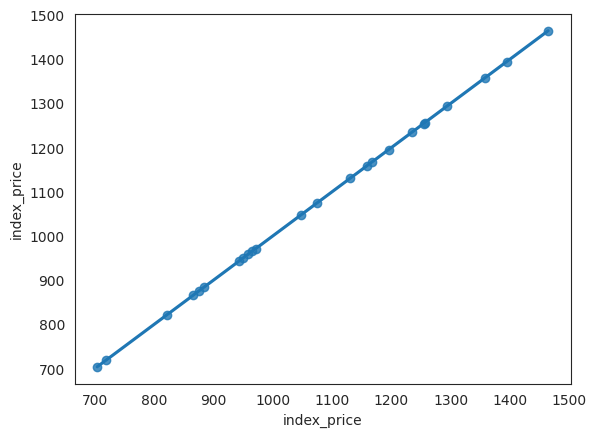

In [20]:
sns.regplot(x=df['index_price'],y=df['index_price'])

In [21]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [22]:
#Apply Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [26]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(validation_score)

-5914.828180162386

In [27]:
#Prediction
y_pred = regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [44]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [  88.27275507 -116.25716066]
Intercept:  1053.4444444444443


In [29]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mae)
print("MAE: ",mae)
print("MSE: ",mse)
print("RMSE: ",rmse)

MAE:  549.3922441707883
MSE:  316313.1524014578
RMSE:  23.439117819806878


In [32]:
#Display R Squared
score = r2_score(y_test,y_pred)
print("R Squared: ",score)

R Squared:  -8.39599834846004


In [33]:
#Display Adjusted R Squared
score2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R-Squared: ",score2)

Adjusted R-Squared:  -14.6599972474334


##ASSUMPTIONS

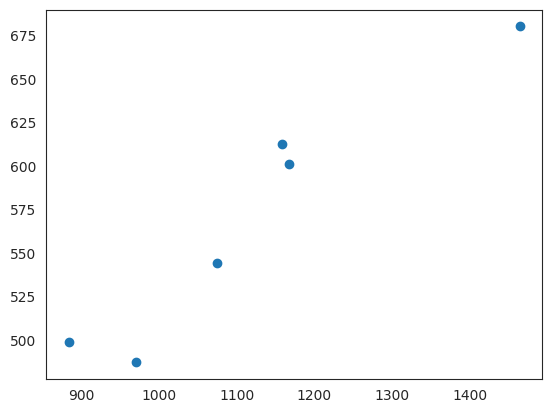

In [34]:
plt.scatter(y_test,y_pred)

In [36]:
residuals = y_pred-y_test
print(residuals)

8    -546.356240
16   -483.872630
0    -783.968431
18   -385.246914
11   -530.927293
9    -565.981956
Name: index_price, dtype: float64


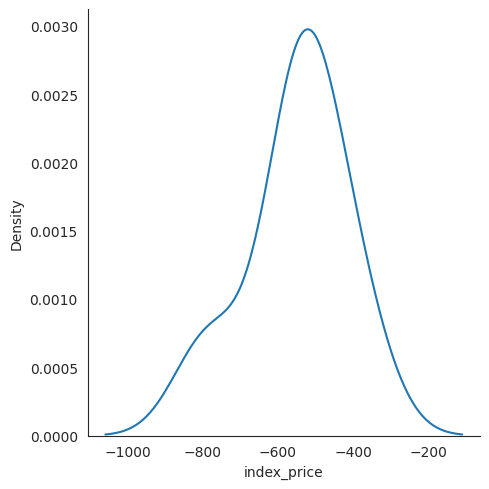

In [37]:
#Plot residuals
sns.displot(residuals,kind='kde')

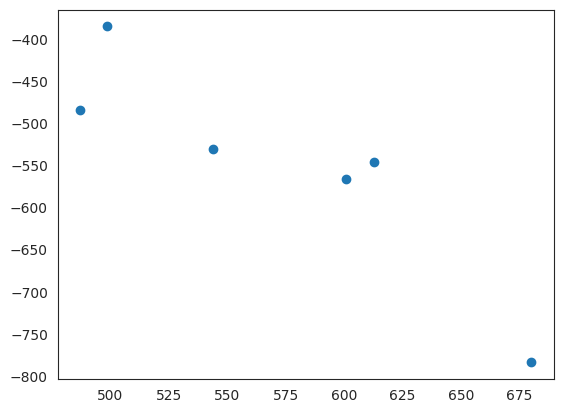

In [38]:
#Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [42]:
#OLS Linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

8    -440.800685
16   -566.317075
0    -373.412875
18   -554.691359
11   -509.371738
9    -452.426401
dtype: float64


In [43]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 10 Aug 2024   Prob (F-statistic):                       0.754
Time:                        18:42:09   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""